<a href="https://colab.research.google.com/github/Aarjugit/Optimizing_movie_ratings/blob/main/Gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
#The available dataset
#It shows the ratings given by 4 users for 5 movies
#at place of 0 ratings we need to do the predictions what users are suppose to give ratings
ratings_data={
    'User1':[5,3,0,1,0],
    'User2':[4,0,0,1,1],
    'User3':[1,1,0,5,5],
    'User4':[1,0,4,4,4]
}
#covert data into pandas dataframe
rating_df=pd.DataFrame(ratings_data,index=['Movie1','Movie2','Movie3','Movie4','Movie5'])
rating_df

,User1,User2,User3,User4
Movie1,5,4,1,1
Movie2,3,0,1,0
Movie3,0,0,0,4
Movie4,1,1,5,4
Movie5,0,1,5,4


In [13]:
#we will use transpose because we want user v/s movies
rating_df=pd.DataFrame(ratings_data,index=['Movie1','Movie2','Movie3','Movie4','Movie5']).T
rating_df

,Movie1,Movie2,Movie3,Movie4,Movie5
User1,5,3,0,1,0
User2,4,0,0,1,1
User3,1,1,0,5,5
User4,1,0,4,4,4


In [14]:
#convert the data into matrix form
ratings_matrix=rating_df.values

In [19]:
# write a function for matrix Factorization with gradient descent
# R=Original Data Matrix,
# P,Q=Factors which going to find, K=No. of features for data define, steps=How quickly tune your matrix,alpha=learning rat and small value,beta= other value as well
def matrix_factorization(R,P,Q,K,steps=5000,alpha=0.0002,beta=0.02):
  #take the transpose of Q for multiplication cz we need to multiply q transpose with P
  Q=Q.T
  #how many times doing gradient descent
  for step in range(steps):
    for i in range(len(R)): #it will iterating over rows of R
      for j in range(len(R[i])): #iterating over columns of R
        if R[i][j]>0: #only perform the values greater than 0
          #calculate the error(deviation) with respect to current P and Q
          eij=R[i][j]-np.dot(P[i,:],Q[:,j])
          #update p and q based on gradient descent
          #based on each feature we will update this
          for k in range(K):
            P[i][k] += alpha*(2*eij*Q[k][j]-beta*P[i][k])
            Q[k][j] += alpha*(2*eij*P[i][k]-beta*Q[k][j])

    e=0
    for i in range(len(R)):
      for j in range(len(R[i])):
        if R[i][j]>0:
          e+=(R[i][j]-np.dot(P[i,:],Q[:,j]))**2
          for k in range(K):
            e+=(beta/2)*(P[i][k]**2+Q[k][j]**2)
    if e<0.001: #Stop if the error is very small
      break
  return P,Q.T
#initialize the number of features,we imagine 2 features
K=2
#users and movies matrix shape we need to define
num_users,num_movies=ratings_matrix.shape
#initialize factor matrices
P=np.random.rand(num_users,K)
Q=np.random.rand(num_movies,K)
nP, nQ= matrix_factorization(ratings_matrix,P,Q,K)
predicted_ratings_matrix=np.dot(nP,nQ.T)
predicted_ratings_df=pd.DataFrame(predicted_ratings_matrix,index=rating_df.index,columns=rating_df.columns)
print("predicted ratings: ")
print(predicted_ratings_df)

print("Actual ratings: ")
print(ratings_matrix)


predicted ratings: 
         Movie1    Movie2    Movie3    Movie4    Movie5
User1  4.987911  2.970136  2.504552  1.055201  1.295044
User2  3.965013  2.365884  2.042905  0.895189  1.085039
User3  0.998868  1.005420  4.902494  4.985545  4.965199
User4  1.003699  0.922597  3.986414  3.990152  3.984309
Actual ratings: 
[[5 3 0 1 0]
 [4 0 0 1 1]
 [1 1 0 5 5]
 [1 0 4 4 4]]


In [18]:
# prompt: correct the code given above

import pandas as pd
import numpy as np

# The available dataset
# It shows the ratings given by 4 users for 5 movies
# At place of 0 ratings we need to do the predictions what users are suppose to give ratings
ratings_data = {
    'User1': [5, 3, 0, 1, 0],
    'User2': [4, 0, 0, 1, 1],
    'User3': [1, 1, 0, 5, 5],
    'User4': [1, 0, 4, 4, 4]
}

# Convert data into pandas dataframe
rating_df = pd.DataFrame(ratings_data, index=['Movie1', 'Movie2', 'Movie3', 'Movie4', 'Movie5'])

# We will use transpose because we want user v/s movies
rating_df = rating_df.T

# Convert the data into matrix form
ratings_matrix = rating_df.values

# Write a function for matrix Factorization with gradient descent
# R=Original Data Matrix,
# P,Q=Factors which going to find, K=No. of features for data define, steps=How quickly tune your matrix,alpha=learning rate and small value,beta= other value as well
def matrix_factorization(R, P, Q, K, steps=5000, alpha=0.0002, beta=0.02):
  Q = Q.T  # Take the transpose of Q for multiplication cz we need to multiply q transpose with P

  for step in range(steps):
    for i in range(len(R)):  # It will iterating over rows of R
      for j in range(len(R[i])):  # Iterating over columns of R
        if R[i][j] > 0:  # Only perform the values greater than 0
          # Calculate the error(deviation) with respect to current P and Q
          eij = R[i][j] - np.dot(P[i, :], Q[:, j])

          # Update p and q based on gradient descent
          # Based on each feature we will update this
          for k in range(K):
            P[i][k] += alpha * (2 * eij * Q[k][j] - beta * P[i][k])
            Q[k][j] += alpha * (2 * eij * P[i][k] - beta * Q[k][j])

    e = 0
    for i in range(len(R)):
      for j in range(len(R[i])):
        if R[i][j] > 0:
          e += (R[i][j] - np.dot(P[i, :], Q[:, j])) ** 2
          for k in range(K):
            e += (beta / 2) * (P[i][k] ** 2 + Q[k][j] ** 2)
    if e < 0.001:  # Stop if the error is very small
      break
  return P, Q.T


# Initialize the number of features, we imagine 2 features
K = 2

# Users and movies matrix shape we need to define
num_users, num_movies = ratings_matrix.shape

# Initialize factor matrices
P = np.random.rand(num_users, K)
Q = np.random.rand(num_movies, K)

nP, nQ = matrix_factorization(ratings_matrix, P, Q, K)
predicted_ratings_matrix = np.dot(nP, nQ.T)
predicted_ratings_df = pd.DataFrame(predicted_ratings_matrix, index=rating_df.index, columns=rating_df.columns)
print("Predicted ratings:")
print(predicted_ratings_df)

print("Actual ratings:")
ratings_matrix

Predicted ratings:
         Movie1    Movie2    Movie3    Movie4    Movie5
User1  4.984540  2.971568  2.106859  1.040257  1.213359
User2  3.970633  2.375383  1.768088  0.923979  1.060935
User3  0.995429  1.007335  4.918082  4.982332  4.970071
User4  1.006102  0.927406  3.984962  3.989124  3.986997
Actual ratings:


array([[5, 3, 0, 1, 0],
       [4, 0, 0, 1, 1],
       [1, 1, 0, 5, 5],
       [1, 0, 4, 4, 4]])

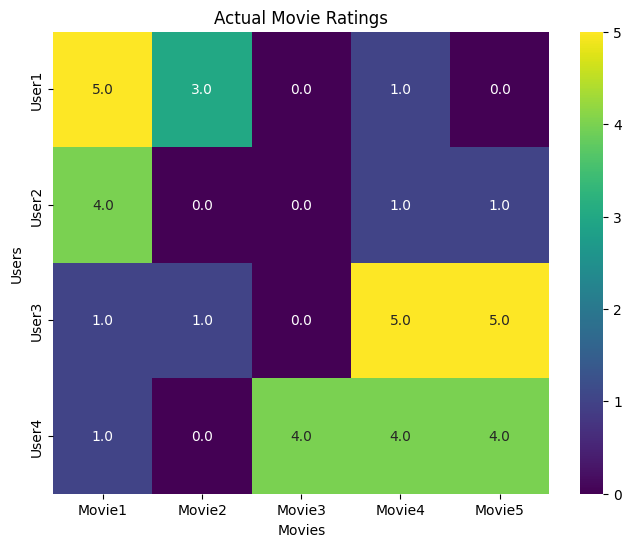

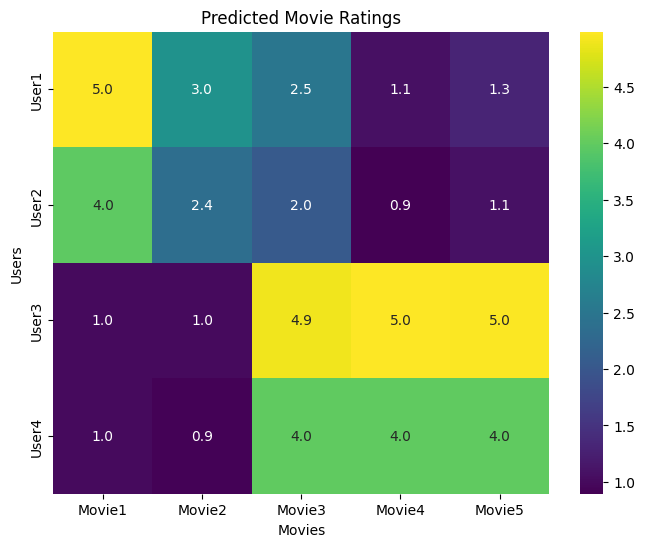

In [20]:
# prompt: do data visualization of the above code

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ... (Your existing code for matrix factorization) ...

# Create a heatmap of the actual ratings
plt.figure(figsize=(8, 6))
sns.heatmap(ratings_matrix, annot=True, cmap='viridis', fmt=".1f",
            xticklabels=rating_df.columns, yticklabels=rating_df.index)
plt.title('Actual Movie Ratings')
plt.xlabel('Movies')
plt.ylabel('Users')
plt.show()


# Create a heatmap of the predicted ratings
plt.figure(figsize=(8, 6))
sns.heatmap(predicted_ratings_matrix, annot=True, cmap='viridis', fmt=".1f",
            xticklabels=rating_df.columns, yticklabels=rating_df.index)
plt.title('Predicted Movie Ratings')
plt.xlabel('Movies')
plt.ylabel('Users')
plt.show()


# You can also create other visualizations like bar plots or scatter plots
# to compare the actual and predicted ratings for specific users or movies.
# For example:
# plt.bar(rating_df.columns, predicted_ratings_df.loc['User1'])
# plt.title('Predicted Ratings for User1')
# plt.xlabel('Movies')
# plt.ylabel('Predicted Rating')
# plt.show()